# Exploratory Analysis

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Set plot style and font
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'

In [24]:
# Construct the path to the pickled DataFrame
data_path = Path("../data/processed/imputed_data.pkl")

# Load the DataFrame
df = pd.read_pickle(data_path)

## Distribution of Variables

Examining histograms of variables before analysis is crucial because it allows you to understand the distribution of the data, including its central tendency and spread. Histograms help identify any skewness or unusual patterns, such as bimodal distributions, that can affect the choice of statistical tests and data preprocessing methods. They also allow you to detect outliers that need to be addressed to prevent skewing the results. Furthermore, understanding the distribution using histograms is essential for deciding on the appropriate transformations or normalization techniques to apply, ensuring that the data meets the assumptions required for many machine learning algorithms.

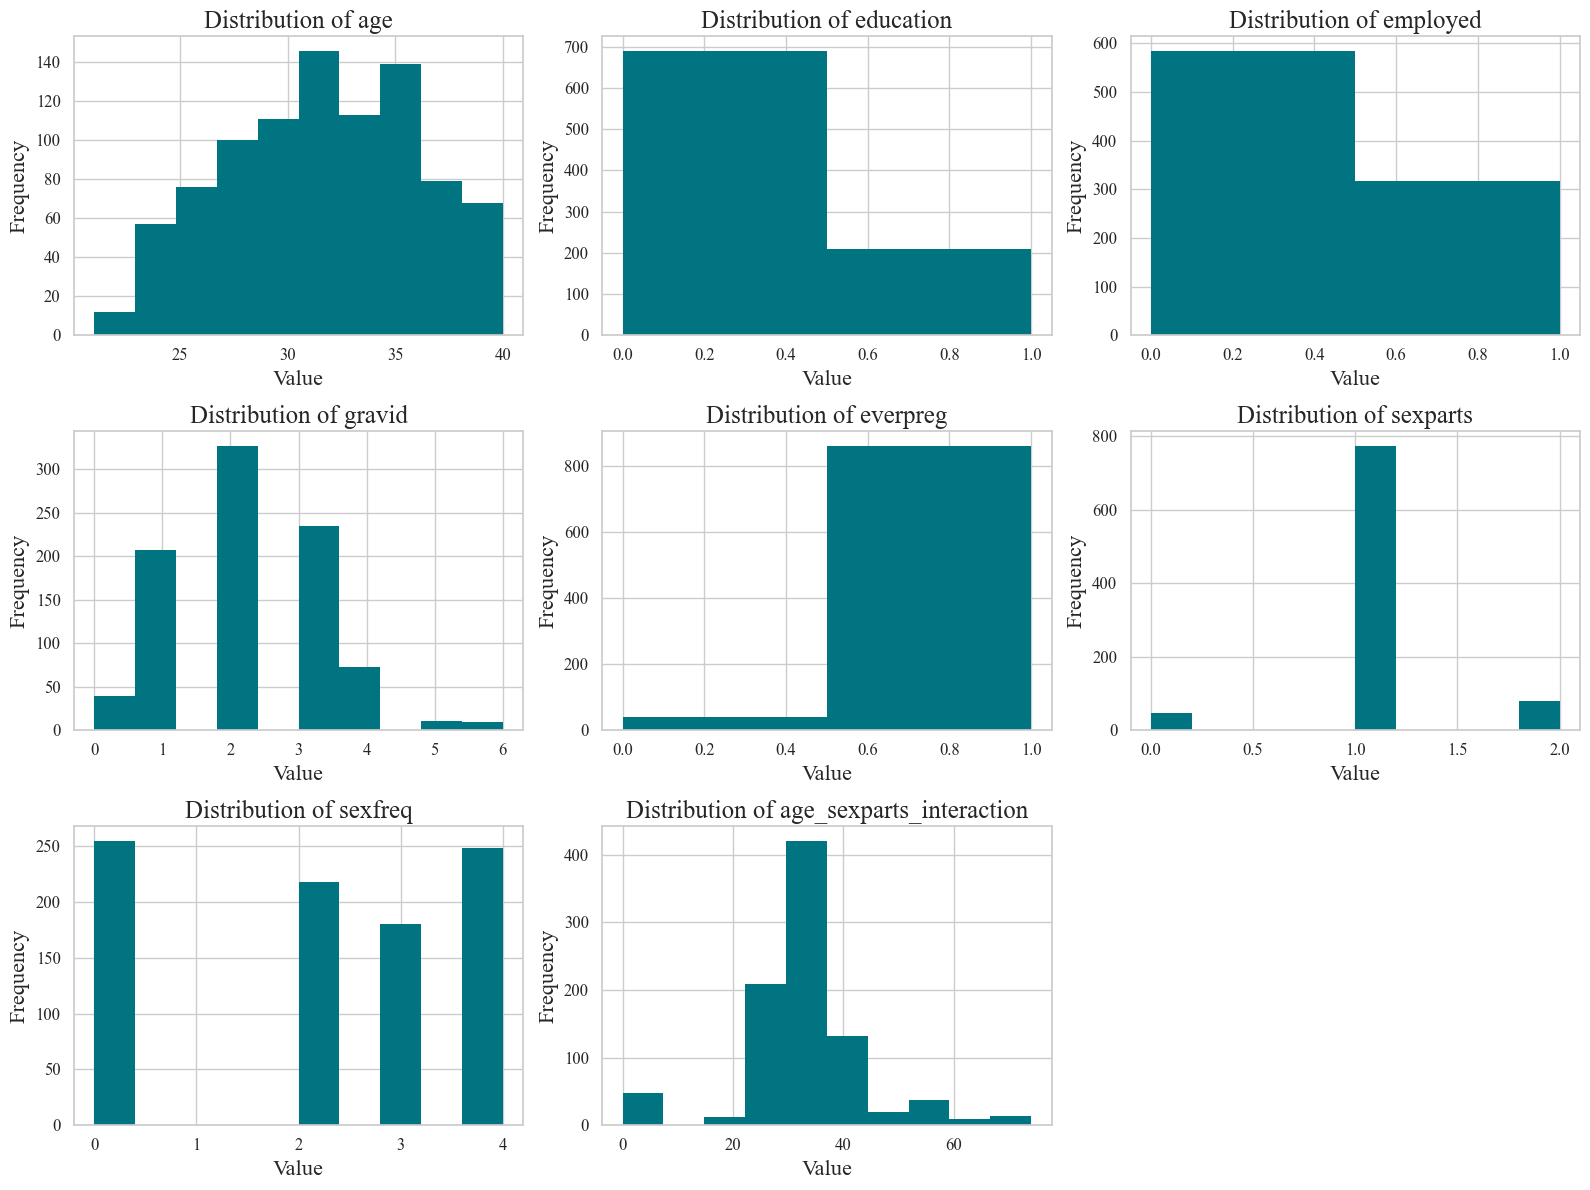

In [25]:
demographic_vars = ['age', 'education', 'employed', 'gravid', 'everpreg', 'sexparts', 'sexfreq', 'age_sexparts_interaction']

num_vars = len(demographic_vars)
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

plt.rcParams['font.family'] = 'Times New Roman'
plt.style.use('default')

for i, column in enumerate(demographic_vars):
    row = i // num_cols
    col = i % num_cols
    
    if len(df[column].unique()) == 2:
        bins = 2
    else:
        bins = 10
    
    axes[row, col].hist(df[column], bins=bins, color='#007481')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=18)
    axes[row, col].set_xlabel('Value', fontsize=16)
    axes[row, col].set_ylabel('Frequency', fontsize=16)
    axes[row, col].tick_params(axis='both', labelsize=12)

# Remove empty subplots
for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

Based on the analysis of the histograms, it can be concluded that the study participants are characterized by a relatively young age - not exceeding 40 years, with the average age oscillating around thirty-something years. It is also observed that most of them do not have higher education or permanent employment. In addition, a significant part of the women studied have experienced pregnancy in the past. In the context of sexual life, the average participant of the study had one partner in the last 12 months and it was noted that sexual activity in the last 3 months ranged from 0 to 4 times.

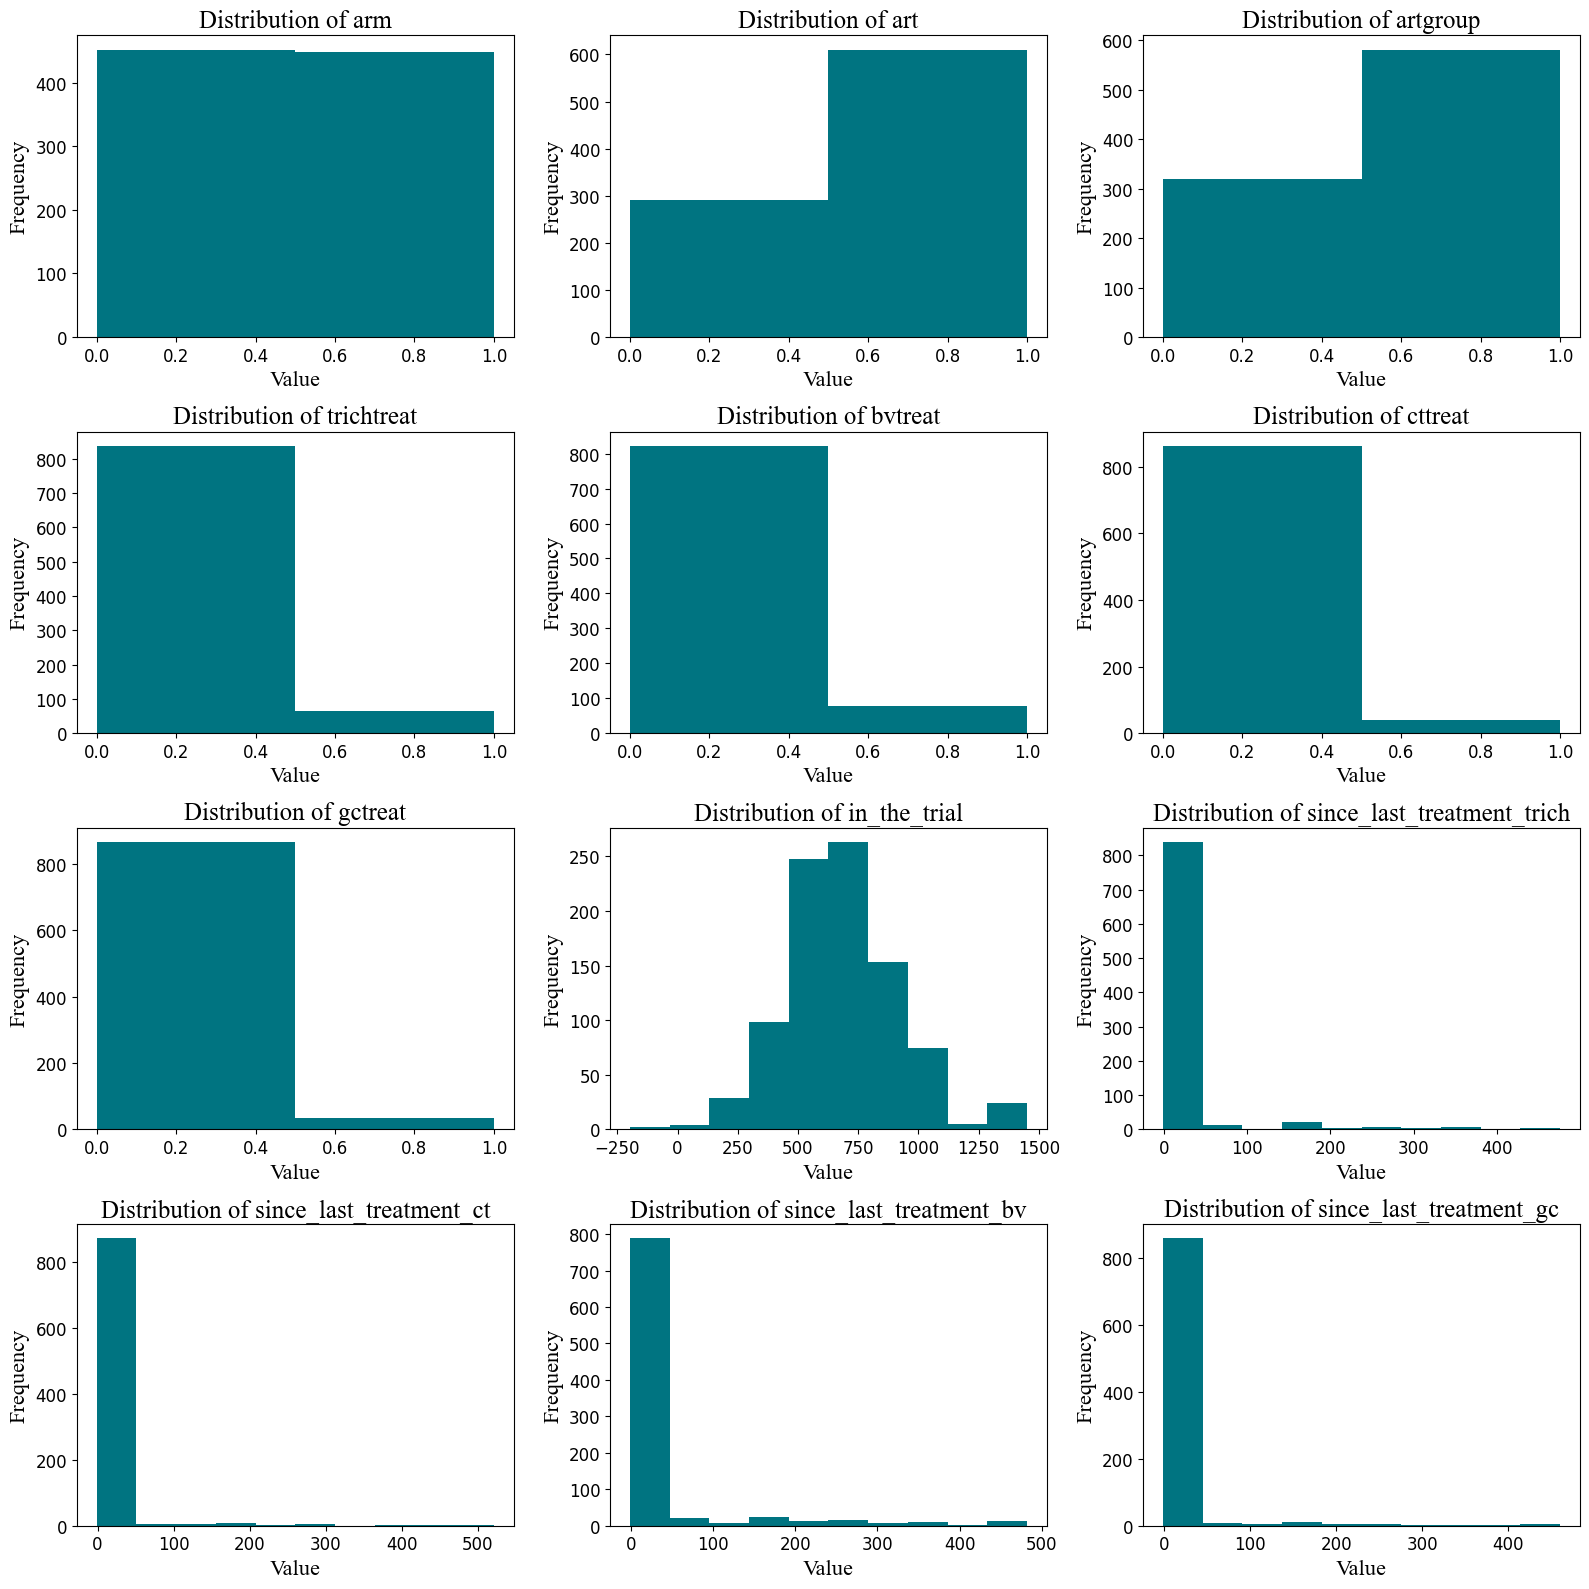

In [26]:
treatment_vars = ['arm', 'art', 'artgroup', 'trichtreat', 'bvtreat', 'cttreat', 'gctreat', 'in_the_trial', 'since_last_treatment_trich', 'since_last_treatment_ct', 'since_last_treatment_bv', 'since_last_treatment_gc']

num_vars = len(treatment_vars)
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

for i, column in enumerate(treatment_vars):
    row = i // num_cols
    col = i % num_cols
    
    if len(df[column].unique()) == 2:
        bins = 2
    else:
        bins = 10
    
    axes[row, col].hist(df[column], bins=bins, color='#007481')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=18, fontname='Times New Roman')
    axes[row, col].set_xlabel('Value', fontsize=16, fontname='Times New Roman')
    axes[row, col].set_ylabel('Frequency', fontsize=16, fontname='Times New Roman')
    axes[row, col].tick_params(axis='both', labelsize=12)

# Remove empty subplots
for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

From the above histograms, it can be concluded that the study groups were divided in half – the number of patients in both groups is almost the same. It is also known that most patients received treatment during the visit, and that most patients were under the care of a doctor before the study began. The variables "trichtreat", "bvtreat", "cttreat", and "gctreat" answer the question of whether the patient received treatment for a specific infection, while analyzing the histograms of variables without the context of the diagnosis of each infection will not provide us with valuable information.

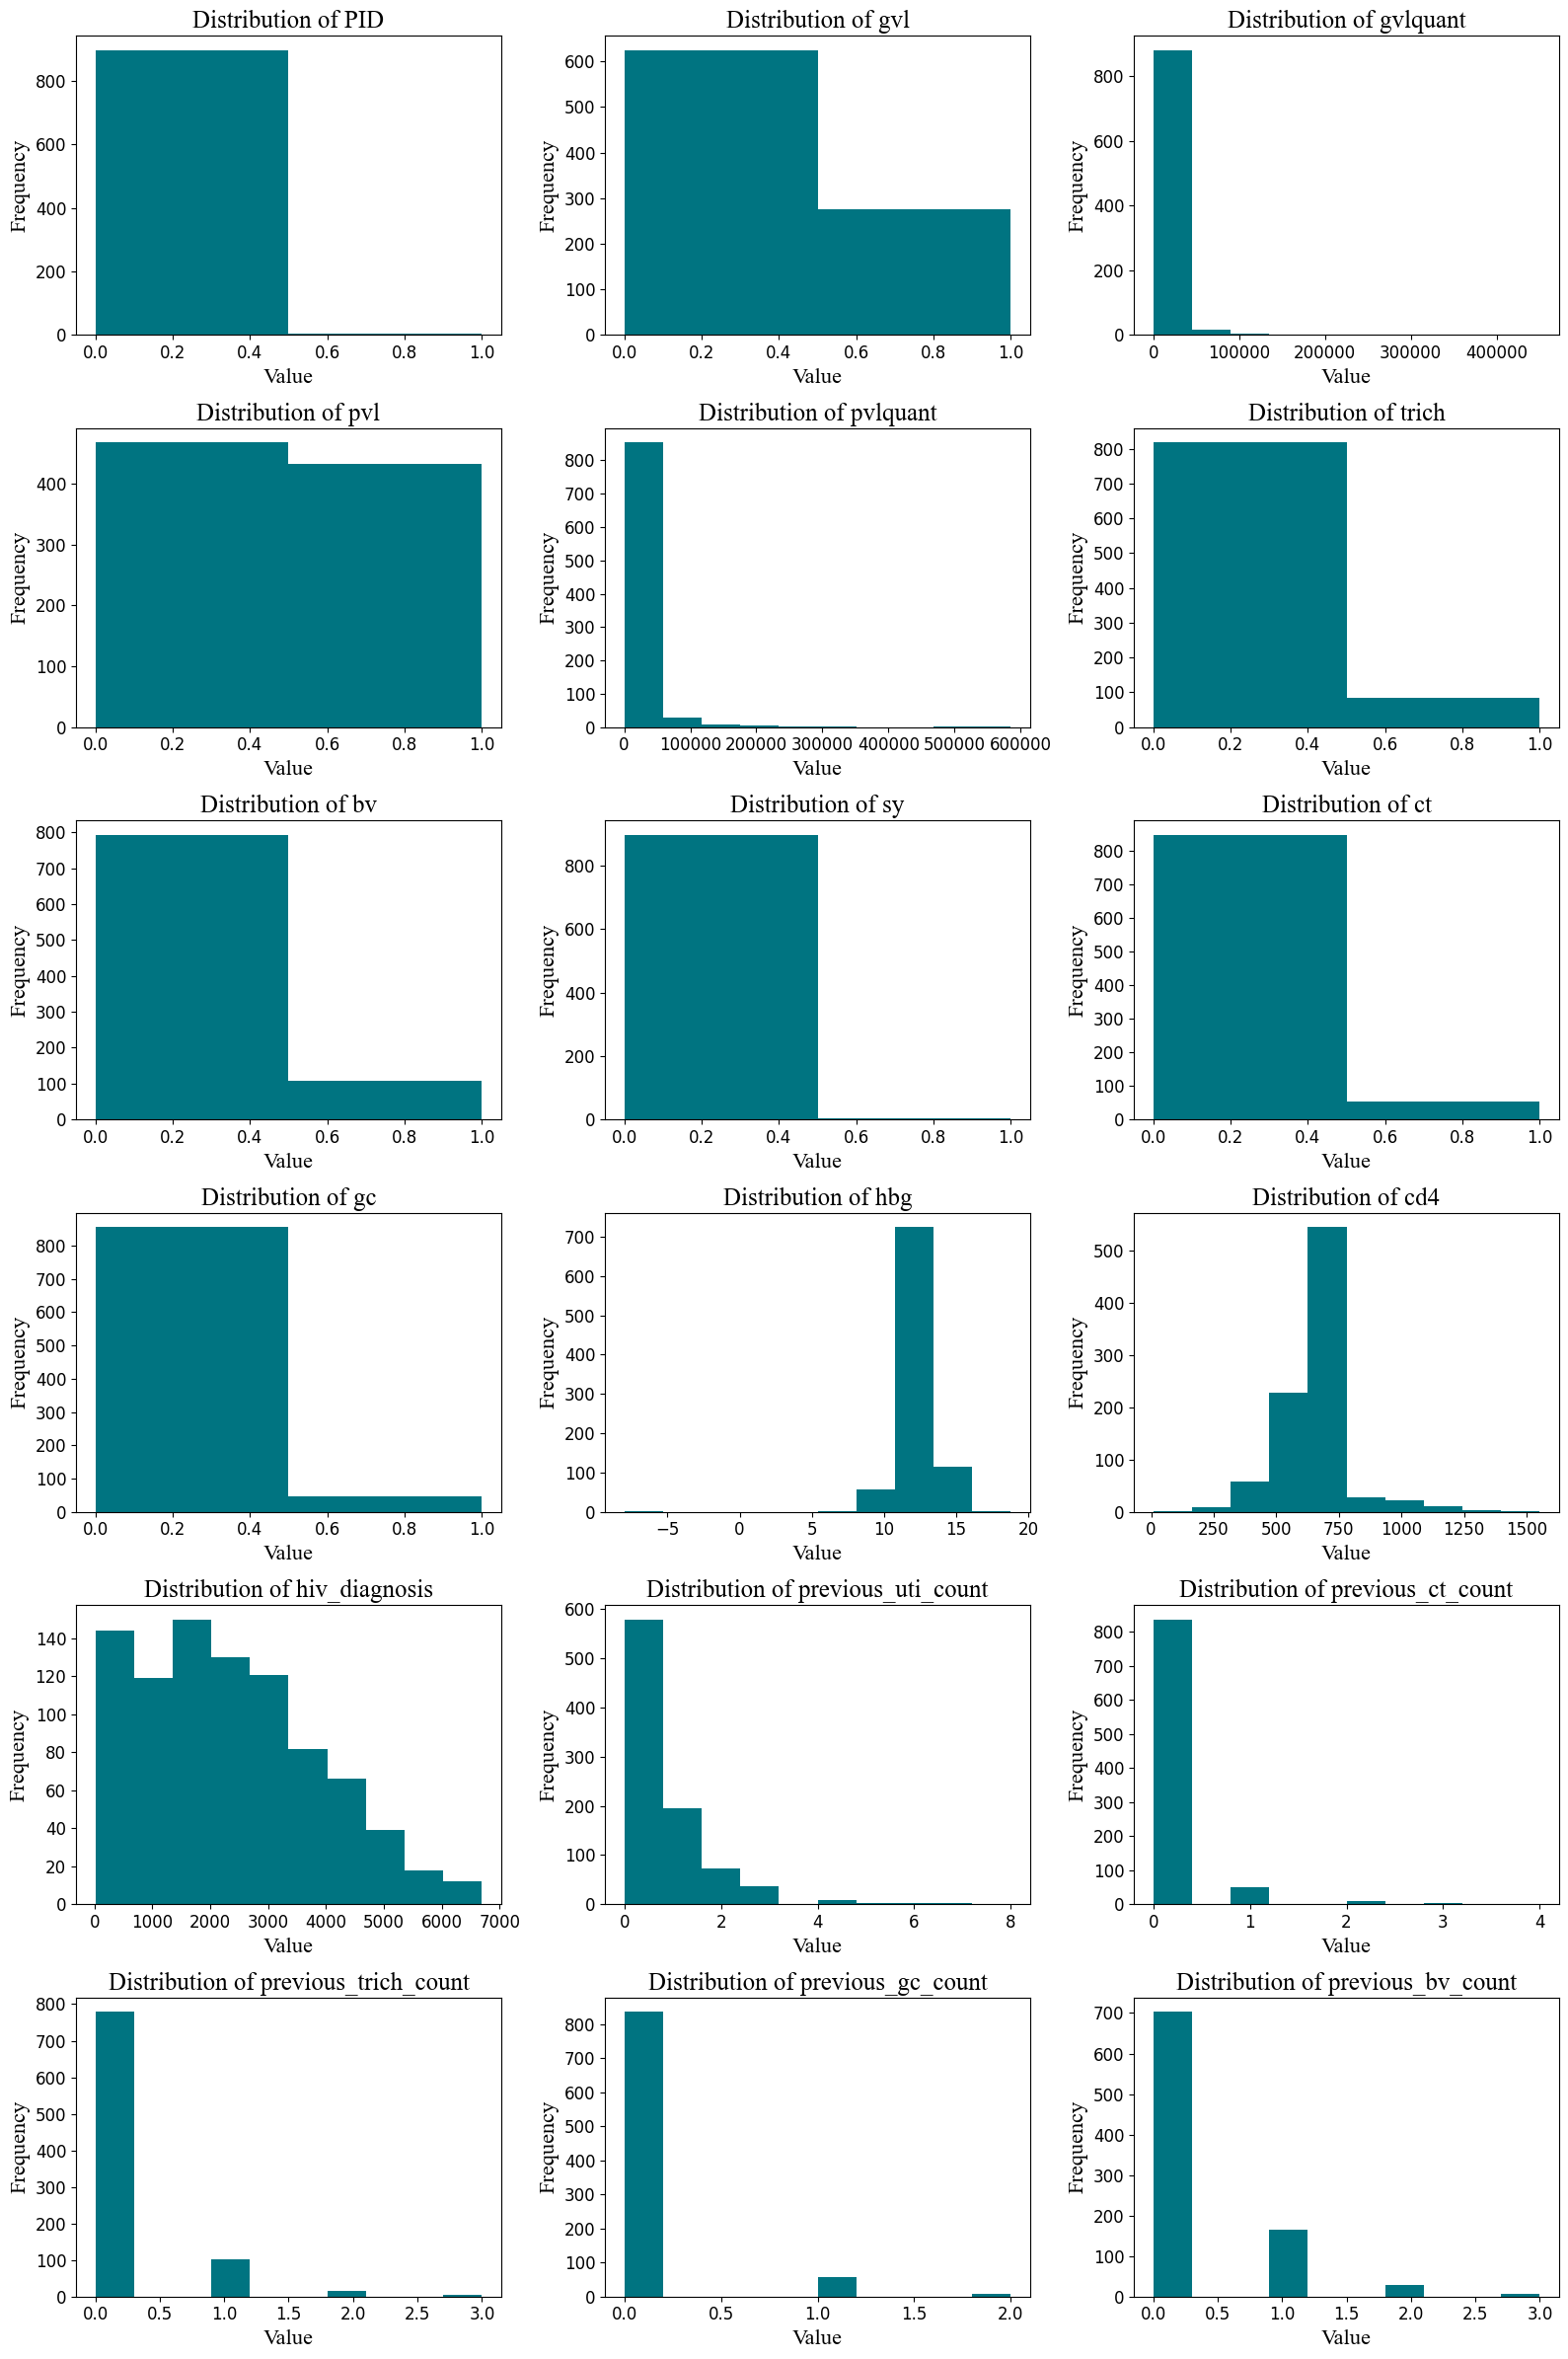

In [27]:
clinical_vars = ['PID', 'gvl', 'gvlquant', 'pvl', 'pvlquant', 'trich', 'bv', 'sy', 'ct', 'gc', 'hbg', 'cd4', 'hiv_diagnosis', 'previous_uti_count', 'previous_ct_count', 'previous_trich_count', 'previous_gc_count', 'previous_bv_count']

num_vars = len(clinical_vars)
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

for i, column in enumerate(clinical_vars):
    row = i // num_cols
    col = i % num_cols
    
    if len(df[column].unique()) == 2:
        bins = 2
    else:
        bins = 10
    
    axes[row, col].hist(df[column], bins=bins, color='#007481')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=18, fontname='Times New Roman')
    axes[row, col].set_xlabel('Value', fontsize=16, fontname='Times New Roman')
    axes[row, col].set_ylabel('Frequency', fontsize=16, fontname='Times New Roman')
    axes[row, col].tick_params(axis='both', labelsize=12)

# Remove empty subplots
for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

From the above histograms, it can be concluded that the most frequently diagnosed diseases are bacterial vaginosis, trichomonas vaginalis, and less frequently chlamydia or gonorrhea. Hemoglobin readings most often fluctuated around 12 g/dl, while CD4 readings averaged 700-800 cells/μl.

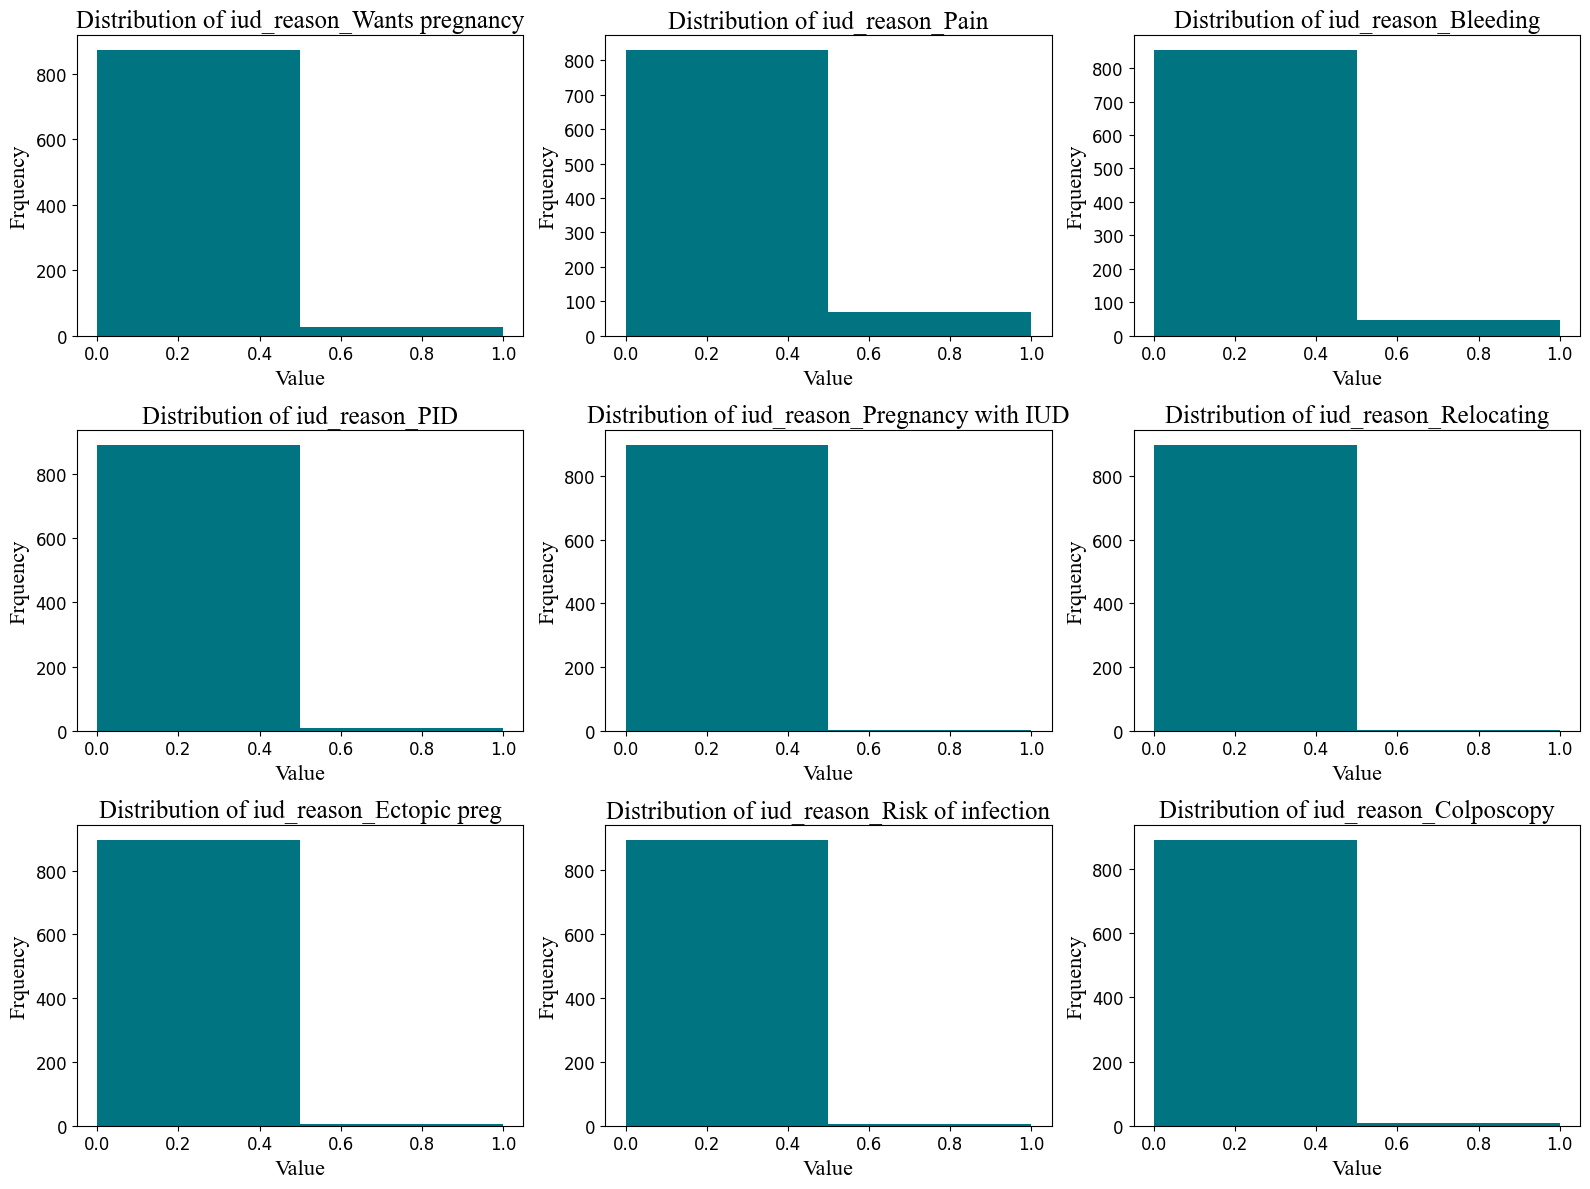

In [28]:
iud_vars = ['iud_reason_Wants pregnancy', 'iud_reason_Pain', 'iud_reason_Bleeding', 'iud_reason_PID', 'iud_reason_Pregnancy with IUD', 'iud_reason_Relocating', 'iud_reason_Ectopic preg', 'iud_reason_Risk of infection', 'iud_reason_Colposcopy']

num_vars = len(iud_vars)
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

for i, column in enumerate(iud_vars):
    row = i // num_cols
    col = i % num_cols
    
    if len(df[column].unique()) == 2:
        bins = 2
    else:
        bins = 10
    
    axes[row, col].hist(df[column], bins=bins, color='#007481')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=18, fontname='Times New Roman')
    axes[row, col].set_xlabel('Value', fontsize=16, fontname='Times New Roman')
    axes[row, col].set_ylabel('Frquency', fontsize=16, fontname='Times New Roman')
    axes[row, col].tick_params(axis='both', labelsize=12)

# Remove empty subplots
for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

The most common reasons for removing an IUD are pain, bleeding, deciding to have a baby, or pelvic inflammatory disease.

## Correlation Between Variables

The visual correlation matrix shows the relationships between different variables from a clinical data set. The matrix uses a color scale to represent the strength and direction of correlations, with green indicating positive correlations and red indicating negative correlations.

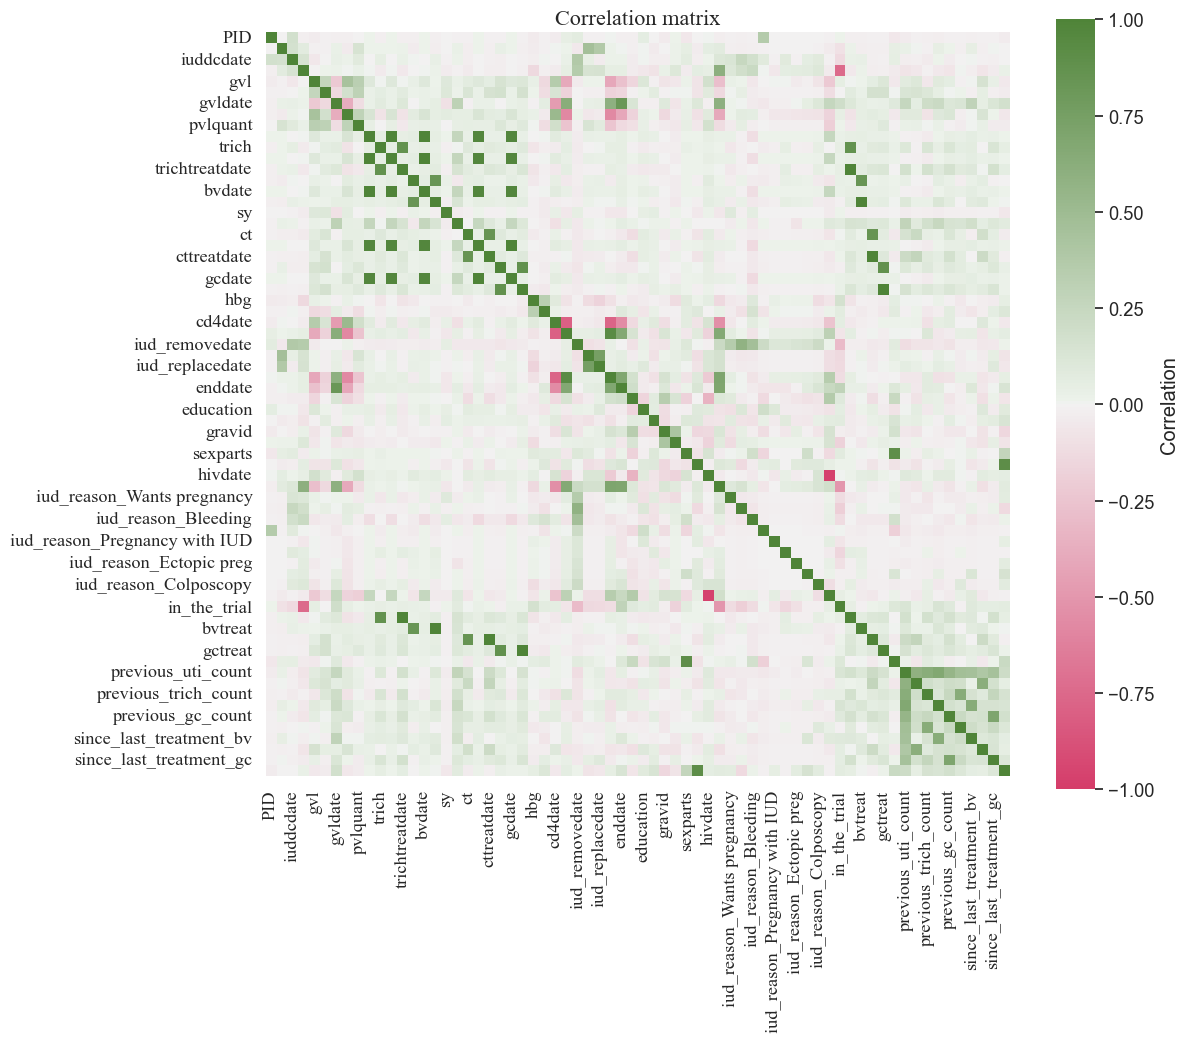

In [29]:
sns.set(font_scale=1.2)

corr_matrix = df.corr()

cmap = sns.diverging_palette(0, 120, as_cmap=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap=cmap, vmin=-1, vmax=1, annot=False, square=True, 
            cbar_kws={"label": "Correlation"}, fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation matrix', fontname='Times New Roman', fontsize=16)
plt.xticks(fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')
plt.show()

Clinical variables such as “PID”, “gvl”, “pvl”, “trich”, “bv”, “sy”, “ct”, “gc”, “hbg”, “cd4”, and “hiv_diagnosis” also show varying degrees of correlation. For example, “gvl” (genital viral load) and “pvl” (plasma viral load) would be expected to have a strong positive correlation, since both measure aspects of viral load in different parts of the body. Demographic variables such as “age”, “education”, “employed”, “gravid”, “everpreg”, “sexparts”, and “sexfreq” are also included in the matrix. It is possible that “age” may show a positive correlation with “everpregem” (ever been pregnant), since age may affect the likelihood of pregnancy. The treatment-related variables “art” (antiretroviral therapy) and “artgroup” show correlation with clinical outcomes such as “cd4” count and “hiv_diagnosis” because they are directly related to HIV treatment and management. It should be noted that although the correlation matrix may reveal interesting relationships between variables, it does not imply causality. Further statistical analysis is necessary to understand the nature and significance of these correlations.